In [69]:
import graphs
import numpy as np
from importlib import reload # reload 
reload(graphs)

<module 'graphs' from '/Users/lucyliu/Documents/harvard/junior/fireflies_simulation/graphs.py'>

In [56]:
graphs.generate_complete(6)

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

In [62]:
graphs.generate_cycle(2)

array([[0, 1],
       [1, 0]])

In [64]:
graphs.generate_path(8)

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [70]:
graphs.generate_grid(4,4, activation_dist = 4)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,

In [1]:
def generate_dumbbell(n): # where n is the number of verts in one "weight" of the dumbbell
    g = np.zeros((2 * n, 2 * n))
    for i in range(n):
        for j in range(n):
            g[i][j] = 1
            g[n + i][n + j] = 1
    g[0][-1] = 1
    g[-1][0] = 1
    return g

def dumbbell_vertices(n, w, h):
    p1 = complete_vertices(n, w/2, h)
    p2 = [np.array([w - i[0], i[1]]) for i in p1]
    return p1 + p2

In [33]:
# c = number of cliques arranged in a cycle, n = number of nodes per clique
def generate_clique_cycle(c, n = 10):
    g = np.zeros((c * n, c * n))
    for i in range(n):
        for j in range(n):
            for cc in range(c):
                g[cc * n + i][cc * n + j] = 1
                
    # bridges between first and last clique
    g[0][-1] = 1
    g[-1][0] = 1
    
    # bridges for rest of cycle
    for cc in range(1, c):
        g[n * cc][n * cc - 1] = 1
        g[n * cc - 1][n * cc] = 1
    return g

def clique_cycle_vertices(c, n, w, h):
    cycle_center = np.array([w / 2, h / 2])
    rad = .8 * min(w, h) / 2
    clique_centers = [rad * np.array([np.cos(i * 2 * np.pi / c), np.sin(i * 2 * np.pi / c)]) + cycle_center for i in range(c)]
    clique_rad = rad * .2
    points = [clique_rad * np.array([np.cos(i * 2 * np.pi / n), np.sin(i * 2 * np.pi / n)]) + clique_centers[cc] for cc in range(c) for i in range(n)]
    return points

In [36]:
generate_clique_cycle(1, n = 5)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [4]:
import numpy as np

In [11]:
generate_dumbbell(5)

array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1.]])

(-2.8000000000000007, 102.8, -2.369297343397352, 102.36929734339735)

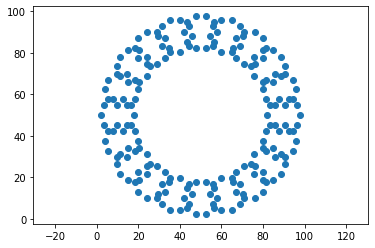

In [35]:
test = clique_cycle_vertices(20, 10, 100, 100)
test = np.array(test)
plt.scatter(test[:,0], test[:,1])
plt.axis("equal")

In [20]:
import matplotlib.pyplot as plt